# Sandbox for data processing and validation

In [2]:
# Load modules
import os
import pandas as pd
import requests
import json
import csv
import time
from dateutil.relativedelta import relativedelta
import datetime as dt
from psaw import PushshiftAPI # https://github.com/dmarx/psaw
from glob import glob


In [218]:
list(df_allsubmissions.columns.values)

['all_awardings',
 'allow_live_comments',
 'approved_at_utc',
 'archived',
 'author',
 'author_cakeday',
 'author_created_utc',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_id',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'banned_at_utc',
 'banned_by',
 'brand_safe',
 'can_gild',
 'can_mod_post',
 'category',
 'content_categories',
 'contest_mode',
 'created_utc',
 'crosspost_parent',
 'crosspost_parent_list',
 'distinguished',
 'domain',
 'edited',
 'full_link',
 'gilded',
 'gildings',
 'hidden',
 'id',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type'

In [4]:
# Load data


## Submissions

###### "KEEP ONLY DATA OF INTEREST" CODE BELOW ######

# Full subreddit scrape
# df_allsubmissions = pd.read_json("data/raw/submissions/allsubmissions-2020-05-16.json") ## Only need to do once
# # DONE! Loaded


# Daily submissions
filenames = glob('data/raw/submissions/dailysubmissions*.json')
dataframes = [pd.read_json(f, orient = 'records') for f in filenames]

# Create list of columns to keep ## HAVE TO BE CAREFUL HERE SINCE NOT ALL FILES HAVE ALL COLUMNS
keep_cols = ['author','id', 'title','created_utc',\
             'selftext', 'score', 'num_comments']

## CHECK THAT COLUMNS EXIST IN DATAFRAME ##
## LOOP THROUGH KEEP_COLS TO SEE IF IT EXISTS IN THE FILE BEFORE CALLING IT ##


# Add relevant columns from all submissions
df_keep = df_allsubmissions[keep_cols]

for i in dataframes:
        
    ### FIGURE OUT WHAT FIELDS I WANNA PULL FROM THE FILE AND CREATE NEW PANDAS DF HERE ##
    df_keep.append(i[keep_cols])

# Name aggregate file
processedfile_csv = "data/processed/submissions/submissions-" + str(day) + ".csv"

# Save to json
df_keep.to_csv(processedfile_csv)
    

    
            

ValueError: Trailing data

In [2]:
## Time series plot of submissions
import matplotlib

df_keep = df_allsubmissions[keep_cols]
df_keep['just_date'] = df_dates['created_utc'].dt.date
# timestamp = pd.to_datetime(df_keep.loc[:,'created_utc'])
# df_keep['timestamp'] = timestamp
# df_keep['just_date'] = pd.to_datetime(df_keep['timestamp']).dt.date


df_keep.set_index('just_date')



NameError: name 'df_allsubmissions' is not defined

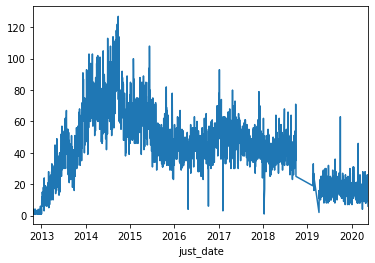

In [271]:
# Plot submissions
df_keep.groupby('just_date').title.count().plot()
## TODO Need to check end of 2018 posts in r/trp



In [294]:
len(df_keep.index)
# 112,211 posts total

112211

In [1]:
df_keep.author.value_counts()
# A lot of deleted posts - 32,861
# 33,984 unique authors (including [deleted + Automod])
# "Endorsed contributors" / mods make most posts (Rollo-Tomassi, GayLubeOil)
### List of mods @ https://www.reddit.com/r/TheRedPill/about/moderators/?before=1830899216



NameError: name 'df_keep' is not defined

In [295]:
df_keep.score.value_counts()
# Range is 45k to 1


1       45368
0       17934
2        2833
3        2099
4        1728
5        1572
6        1520
7        1352
8        1221
9        1134
10       1017
11        906
12        897
13        863
14        784
15        745
16        730
17        674
19        634
18        601
20        580
21        579
22        526
23        483
25        469
24        468
26        413
28        407
27        385
29        368
        ...  
1048        1
1461        1
1077        1
780         1
1163        1
844         1
686         1
1036        1
1100        1
1356        1
2799        1
1419        1
1035        1
842         1
793         1
1034        1
1098        1
1162        1
1196        1
985         1
921         1
1206        1
941         1
1078        1
729         1
950         1
822         1
877         1
779         1
1791        1
Name: score, Length: 1103, dtype: int64

In [269]:
df_keep.just_date.unique()

array([datetime.date(1970, 1, 1)], dtype=object)

In [276]:
## Comments

# Full subreddit scrape

# Create list of columns to keep
comm_keep_cols = ['author','id', 'utc_created',\
                   'selftext','score'] ## need to verify column names after loading in

chunk_size = 10 ** 4

chunks = pd.read_json("data/raw/comments/allcomments-asof-2020-05-25.json", lines = True, chunksize = chunk_size)

df_keep = pd.DataFrame()

for c in chunks:    
    df_keep = df_keep.append(chunk[comm_keep_cols])
    # df_allcomments = pd.DataFrame() # empty for memory purposes

# # Daily submissions
# filenames = glob('data/raw/comments/daily*.json')
# dataframes = [pd.read_csv(f) for f in filenames]


# # Add relevant columns from all submissions
# df_keep_comments = df_allcomments[comm_keep_cols]

# for i in dataframes: 
#     ### FIGURE OUT WHAT FIELDS I WANNA PULL FROM THE FILE AND CREATE NEW PANDAS DF HERE ##
#     df_keep_comments.append(i[comm_keep_cols])

# # Name aggregate file
# processedfile_json = "data/processed/submissions/submissions-" + str(day) + ".json"

# # Save to json
# df_keep_comments.to_json(processedfile_json)
    

ValueError: Expected object or value

In [ ]:
# Graveyard from chunk above
# # Iterate through the daily files (so from 05/16 til 'yesterday' based on current day) 
# today = dt.datetime.utcnow().date()
# yesterday = today - dt.timedelta(days = 1)

# scrape_date = dt.date(2020, 5, 16)

# time_between_dates = yesterday - scrape_date # starting from yesterday since daily scrape is of yesterdays data
# days_between_dates = time_between_dates.days

# # [had a for loop set up to go through all the days]
#     day = scrape_date + dt.timedelta(days = i)
#     daily_json = "dailysubmissions-" + str(day) +".json"   
#     daily_data = pd.read_json(daily_json)

In [6]:
# Daily submissions
filenames = glob('data/raw/submissions/dailysubmissions*.json')
dataframes = [pd.read_json(f, orient = 'records') for f in filenames] # this is a list of data frames
dataframes 

## now have all data frames in a list of data frames    



ValueError: Trailing data

In [27]:
print(scrape_date)
print(yesterday)
list(df_allsubmissions.columns.values)

2020-05-16
2020-05-24


['all_awardings',
 'allow_live_comments',
 'approved_at_utc',
 'archived',
 'author',
 'author_cakeday',
 'author_created_utc',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_id',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'banned_at_utc',
 'banned_by',
 'brand_safe',
 'can_gild',
 'can_mod_post',
 'category',
 'content_categories',
 'contest_mode',
 'created_utc',
 'crosspost_parent',
 'crosspost_parent_list',
 'distinguished',
 'domain',
 'edited',
 'full_link',
 'gilded',
 'gildings',
 'hidden',
 'id',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type'

In [74]:
# Check for duplicates

# Check column names to ID submission ID -- only need to do once
# subcols = list(df_allsubmissions.columns.values)
# print(sub_cols) # column we want is 'id' 
# len(sub_cols) # there are 104 fields

# Get number of submissions and check there are as many unique IDs
def hasNoDuplicates(ls_ids):
    """Check for duplicates in a list of post or comment ids"""
    num_ids = len(ls_ids) # get number of submissions
    num_uniqueids = len(set(ls_ids))
        
    if num_ids == num_uniqueids:
        print("No duplicate submissions")
        return True
    else:
        print("Duplicates exist")
        return False
        
hasNoDuplicates(df_allsubmissions['id'])

No duplicate submissions


True

## Submission check for dupes

In [7]:
## Submission check for dupes

# Load daily submissions
filenames = glob('data/raw/submissions/daily*.json')
dataframes = [pd.read_json(f) for f in filenames] # this is a list of data frames 

# Get all submission ids
all_ids = []

for i in dataframes:
    daily_ids = i['id'].tolist()
    all_ids.extend(daily_ids)

# Check for duplicates
hasNoDuplicates(all_ids)
    

ValueError: Trailing data

## Comment check for dupes

In [8]:
## Comment check for dupes

# Load all comments
## TODO - file size

# Load daily comments
filenames = glob('data/raw/comments/daily*.json')
comments_dataframes = [pd.read_json(f) for f in filenames] # this is a list of data frames

# Get all comment ids
all_ids = []

for i in comments_dataframes:
    daily_ids = i['id'].tolist()
    all_ids.extend(daily_ids)

# Check for duplicates
hasNoDuplicates(all_ids)

ValueError: Trailing data

## Submissions time series check

In [ ]:
# Check to make sure all time periods covered (i.e. that API didn't miss any date range)

In [197]:
# Get earliest date in submissions
df_dates = pd.to_datetime(df_allsubmissions['created_utc'], unit = 's')
df_dates = df_dates.append(df_)
df_dates = df_dates.to_frame()
df_dates['just_date'] = df_dates['created_utc'].dt.date
df_dates['title'] = df_allsubmissions['title']

df_dates.to_json("data/validate/trp_all_submissions.json")


earliest_datetime = df_dates['created_utc'].min()
earliest_date = df_dates['just_date'].min()

latest_datetime = df_dates['created_utc'].max()
latest_date = df_dates['just_date'].max()


# Plot time series + frequency
## See above plot



#missing_dates = pd.date_range(start = earliest_date, end = latest_date).difference(df_dates['just_date'])
## Honestly not sure if need this ^^ returning ALLL dates wtf

# missing_dates = pd.DataFrame(missing_dates)
# missing_dates


In [192]:
## THIS IS ME TRYING TO FIND MISSING DATES BUT IT WON'T WORK FFFFFF

# df_allsubmissions.created_utc

# type(pd.to_datetime(df_allsubmissions['created_utc'], unit='s')[1])

#earliest_date[0].date()

earliest_date = df_dates['just_date'].min()

all_dates = pd.date_range(start = earliest_date, end = latest_date)
all_dates = pd.DataFrame(all_dates)
all_dates.columns = ['date']
all_dates = pd.to_datetime(all_dates['date'], unit = 'D')


type(all_dates)


# df_time['td'] = all_dates - df_dates['just_date'] ## getting error - BUT DO I EVEN NEED THIS


#print(type(all_dates['date']))



pandas.core.series.Series

## Comments time series check


In [290]:
# Load all comments
# filenames = glob('data/raw/comments/all/*.json') ## WILL DO THIS LATER
daily_filenames = glob('data/raw/comments/daily*.json')

keep_cols = ['author','id', 'created_utc',\
             'body', 'score', 'parent_id']

df_all = pd.DataFrame()

for file in daily_filenames: 
    with open(file) as f:
        data = []
        
        for line in f:
            data.extend(json.loads(line))
       
        df = pd.DataFrame(data) 
        print(df)
        break
        df_keep = df[keep_cols]
        df_keep
        break
    
    break

    
    

                                  0
0                     all_awardings
1                  associated_award
2                            author
3                    author_cakeday
4     author_flair_background_color
5            author_flair_css_class
6             author_flair_richtext
7          author_flair_template_id
8                 author_flair_text
9           author_flair_text_color
10                author_flair_type
11                  author_fullname
12             author_patreon_flair
13                   author_premium
14                         awarders
15                             body
16  collapsed_because_crowd_control
17                          created
18                      created_utc
19                    distinguished
20                           edited
21                         gildings
22                               id
23                     is_submitter
24                          link_id
25                           locked
26                        no

list